**Run all the cells below to make sure everything is working and ready to go. All cells should run without error.**

### Test Matplotlib and Plotting

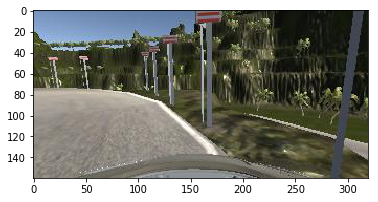

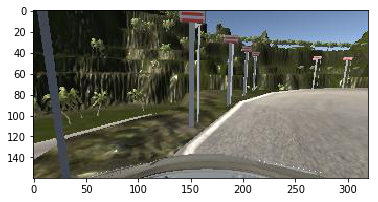

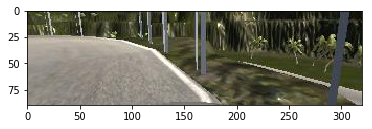

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from keras.layers import Cropping2D
from keras.models import load_model
import cv2

img = plt.imread('report/Track2_recovery_centercamera.jpg')
plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(cv2.flip(img,1))
top = 50
bottom = 20
cropped = img[top:160-bottom]
plt.figure()
plt.imshow(cropped)
plt.show()



In [4]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import random

dir_names = ['Training-Track1', 'Training-Track1-1', 'Training-Track1-2', 'Training-Track2', 'Training-Track2-1', 'Training-Track2-2', 'Training-Track2-3', 'Training-Track2-4']

fbw = open('full_driving_log.csv', 'w')
write_handle = csv.writer(fbw)
    
for dir_name in dir_names:
    with open(dir_name + '/driving_log.csv') as fb:
        lines = csv.reader(fb)
        if "Track1" in dir_name:
            thresh = 1000
        else:
            thresh = 600
            
        count = 0    
        for line in lines:            
            if line[0] == "center":
                continue
                
            cur = float(line[3])                        
            if abs(cur) <= 0.05 and count > thresh:
                continue
            
            r  = random.randint(0,1)            
            newline = []            
            if r == 0:
                filename = dir_name + '/IMG/' + line[1].split('\\')[-1]
                newline.append(filename)
                newline.append(str(cur + 0.2))
            else:
                filename = dir_name + '/IMG/' + line[2].split('\\')[-1]
                newline.append(filename)
                newline.append(str(cur - 0.2))
            
            write_handle.writerow(newline)
            
            newline = []
            filename = dir_name + '/IMG/' + line[0].split('\\')[-1]
            newline.append(filename)
            newline.append(str(cur))
            write_handle.writerow(newline)
            
            newline = []
            filename = dir_name + '/IMG/' + 'flipped#' + line[0].split('\\')[-1]
            newline.append(filename)
            newline.append(str(cur * -1.0))
            write_handle.writerow(newline)
            
            count = count + 1
            
fbw.close()


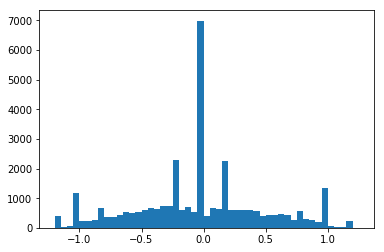

In [5]:
with open('full_driving_log.csv', 'r') as fb:
    read_handle = csv.reader(fb)
    angles = []
    for line in read_handle:
        angles.append(float(line[1]))
        
    angles = np.array(angles)
    
    plt.hist(angles, bins=np.arange(min(angles), max(angles)+0.1, .05))
    plt.show()
    
    